<a href="https://colab.research.google.com/github/Colsai/Covid-Visualizations-And-Trends/blob/main/covid_visualizations_county_MD.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# US Covid Trends and Predictions 
<blockquote> Scott Hirabayashi | (Sourced from NYT's Github) | 2020  </blockquote>

- Visualizations and Basic Information about trends in cases, etc.  
- Included- A Basic ML Model to Estimate Cases and Deaths  
- Focus on USA/ MD / VA  
- NYT Datasets Used  


In [111]:
#Datetime To Convert Dates
from datetime import datetime

#Import Packages for Data
import pandas as pd
import numpy as np
import scipy as sci
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import scale
import statistics

In [112]:
#Seaborn/Matplotlib basic stats
sns.set(style="ticks")
plt.style.use('seaborn-white')

In [113]:
#Cases by day from beginning (US). This is a large dataframe, so it make take a bit to load.

#USA Data will be the dataframe for national data
site = 'https://raw.githubusercontent.com/nytimes/covid-19-data/master/us-counties.csv'
states_df = pd.read_csv(site)

In [114]:
#Head of the data
states_df.head()

,date,county,state,fips,cases,deaths
0,2020-01-21,Snohomish,Washington,53061.0,1,0.0
1,2020-01-22,Snohomish,Washington,53061.0,1,0.0
2,2020-01-23,Snohomish,Washington,53061.0,1,0.0
3,2020-01-24,Cook,Illinois,17031.0,1,0.0
4,2020-01-24,Snohomish,Washington,53061.0,1,0.0


In [115]:
#Tail of the data
states_df.tail()

,date,county,state,fips,cases,deaths
813412,2020-12-09,Sweetwater,Wyoming,56037.0,2245,13.0
813413,2020-12-09,Teton,Wyoming,56039.0,1834,2.0
813414,2020-12-09,Uinta,Wyoming,56041.0,1250,7.0
813415,2020-12-09,Washakie,Wyoming,56043.0,585,11.0
813416,2020-12-09,Weston,Wyoming,56045.0,427,2.0


In [116]:
#Sample of the data
states_df.sample(5)

,date,county,state,fips,cases,deaths
252943,2020-06-19,Holmes,Florida,12059.0,45,0.0
268908,2020-06-24,Tazewell,Illinois,17179.0,115,7.0
398243,2020-08-03,Archer,Texas,48009.0,20,0.0
22787,2020-03-31,Oktibbeha,Mississippi,28105.0,17,0.0
305900,2020-07-05,Pacific,Washington,53049.0,18,1.0


In [132]:
#Let's See What We Have...
states_df.describe()

,cases,deaths
count,813417.000000,796372.000000
mean,1638.767364,49.473617
std,8589.349336,442.036904
min,0.000000,0.000000
25%,30.000000,0.000000
50%,182.000000,3.000000
75%,806.000000,18.000000
max,475409.000000,24416.000000


In [118]:
#Shape of the Dataframe
states_df.shape

(813417, 6)

In [119]:
#What are the different types of data?
states_df.dtypes

date       object
county     object
state      object
fips      float64
cases       int64
deaths    float64
dtype: object

In [120]:
#Let's convert the states_df date to datetime, so that it will graph easier. 
states_df['date'] = pd.to_datetime(states_df['date'])

In [121]:
#
states_df = states_df.drop(columns = "fips")

In [122]:
states_df.melt(id_vars = ["date", "county", "state"])

,date,county,state,variable,value
0,2020-01-21,Snohomish,Washington,cases,1.0
1,2020-01-22,Snohomish,Washington,cases,1.0
2,2020-01-23,Snohomish,Washington,cases,1.0
3,2020-01-24,Cook,Illinois,cases,1.0
4,2020-01-24,Snohomish,Washington,cases,1.0
...,...,...,...,...,...
1626829,2020-12-09,Sweetwater,Wyoming,deaths,13.0
1626830,2020-12-09,Teton,Wyoming,deaths,2.0
1626831,2020-12-09,Uinta,Wyoming,deaths,7.0
1626832,2020-12-09,Washakie,Wyoming,deaths,11.0


In [123]:
co_df = states_df.loc[(states_df['state'] == "Maryland") & (states_df['county'] == "Montgomery")]
co_df = co_df.reset_index()
co_df.head()

,index,date,county,state,cases,deaths
0,555,2020-03-05,Montgomery,Maryland,3,0.0
1,615,2020-03-06,Montgomery,Maryland,3,0.0
2,700,2020-03-07,Montgomery,Maryland,3,0.0
3,802,2020-03-08,Montgomery,Maryland,4,0.0
4,925,2020-03-09,Montgomery,Maryland,4,0.0


In [134]:
co_df.head()

,index,date,county,state,cases,deaths
0,555,2020-03-05,Montgomery,Maryland,3,0.0
1,615,2020-03-06,Montgomery,Maryland,3,0.0
2,700,2020-03-07,Montgomery,Maryland,3,0.0
3,802,2020-03-08,Montgomery,Maryland,4,0.0
4,925,2020-03-09,Montgomery,Maryland,4,0.0


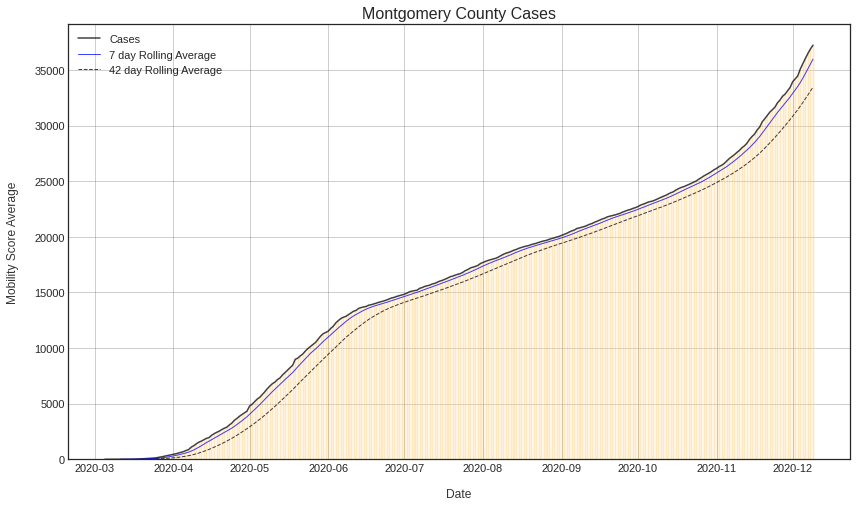

In [146]:
#EDA Basic Plotting for Cases by Date
date = co_df['date']
co_cases = co_df['cases']
co_deaths = co_df['deaths']

fig, ax = plt.subplots(figsize = (14,8))

ax.plot(date, co_cases, '-', alpha = .75, color = 'black', label = f"Cases")
ax.bar(date, co_cases, alpha = .25, color = 'orange')
ax.plot(date, co_cases.rolling(7).mean(), '-', alpha = .75, linewidth = 1, color = 'blue', label = "7 day Rolling Average")
ax.plot(date, co_cases.rolling(21).mean(), '--', alpha = .75, linewidth = 1, color = 'black', label = "42 day Rolling Average")

ax.set_title(f"Montgomery County Cases", fontsize = 16)
ax.grid(which = 'both', color='gray', alpha = .75, linestyle='-', linewidth=.5)
ax.set_xlabel("Date", labelpad=15, fontsize=12, color="#333533");
ax.set_ylabel(f"Mobility Score Average", labelpad=15, fontsize=12, color="#333533")
ax.legend()

In [155]:
md_df = states_df.loc[(states_df['state'] == "Maryland")]

In [160]:
#Let's look at Montgomery County and Prince George's
mc_df = states_df.loc[(states_df['state'] == "Maryland") & (states_df['county'] == "Montgomery")]
pg_df = states_df.loc[(states_df['state'] == "Maryland") & (states_df['county'] == "Prince George's")]

#Reset the Indexes
pg_df = pg_df.reset_index()
mc_df = mc_df.reset_index()

In [162]:
#What's at the start of the dataframe?
pg_df.head()

,index,date,county,state,cases,deaths
0,926,2020-03-09,Prince George's,Maryland,1,0.0
1,1072,2020-03-10,Prince George's,Maryland,3,0.0
2,1252,2020-03-11,Prince George's,Maryland,5,0.0
3,1470,2020-03-12,Prince George's,Maryland,5,0.0
4,1749,2020-03-13,Prince George's,Maryland,7,0.0


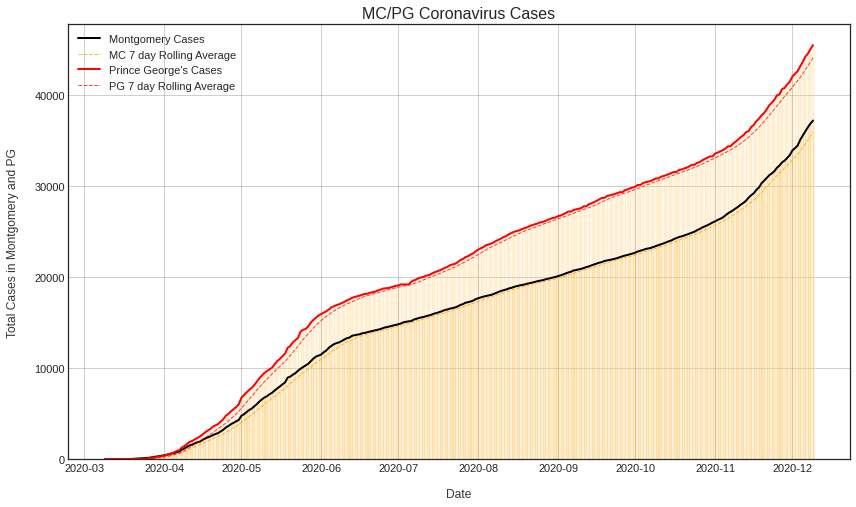

In [180]:
#EDA Basic Plotting for Cases by Date
date = mc_df['date'][4:]
mc_cases = mc_df['cases'][4:]
pg_cases = pg_df['cases']

fig, ax = plt.subplots(figsize = (14,8))

ax.plot(date, mc_cases, '-', alpha = 1, color = 'black', linewidth = 2, label = f"Montgomery Cases")
ax.bar(date, mc_cases, alpha = .2, color = 'orange')
ax.plot(date, mc_cases.rolling(7).mean(), '--', alpha = .75, linewidth = 1, color = 'orange', label = "MC 7 day Rolling Average")

ax.plot(date, pg_cases, '-', alpha = 1, color = 'red', linewidth = 2, label = f"Prince George's Cases")
ax.bar(date, pg_cases, alpha = .2, color = 'orange')
ax.plot(date, pg_cases.rolling(7).mean(), '--', alpha = .75, linewidth = 1, color = 'red', label = "PG 7 day Rolling Average")

ax.set_title(f"MC/PG Coronavirus Cases", fontsize = 16)
ax.grid(which = 'both', color='gray', alpha = .75, linestyle='-', linewidth=.5)
ax.set_xlabel("Date", labelpad=15, fontsize=12, color="#333533");
ax.set_ylabel(f"Total Cases in Montgomery and PG", labelpad=15, fontsize=12, color="#333533")
ax.legend()